In [1]:
import arviz as az
import numpy as np

In [2]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
schools = np.array(
    [
        "Choate",
        "Deerfield",
        "Phillips Andover",
        "Phillips Exeter",
        "Hotchkiss",
        "Lawrenceville",
        "St. Paul's",
        "Mt. Hermon",
    ]
)

In [3]:
# ArviZ ships with style sheets!
az.style.use("arviz-darkgrid")

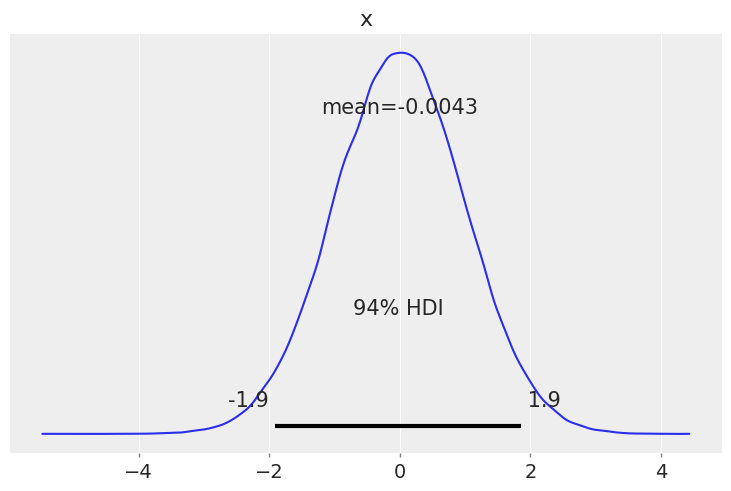

In [6]:
rng = np.random.default_rng()
az.plot_posterior(rng.normal(size=100_000));

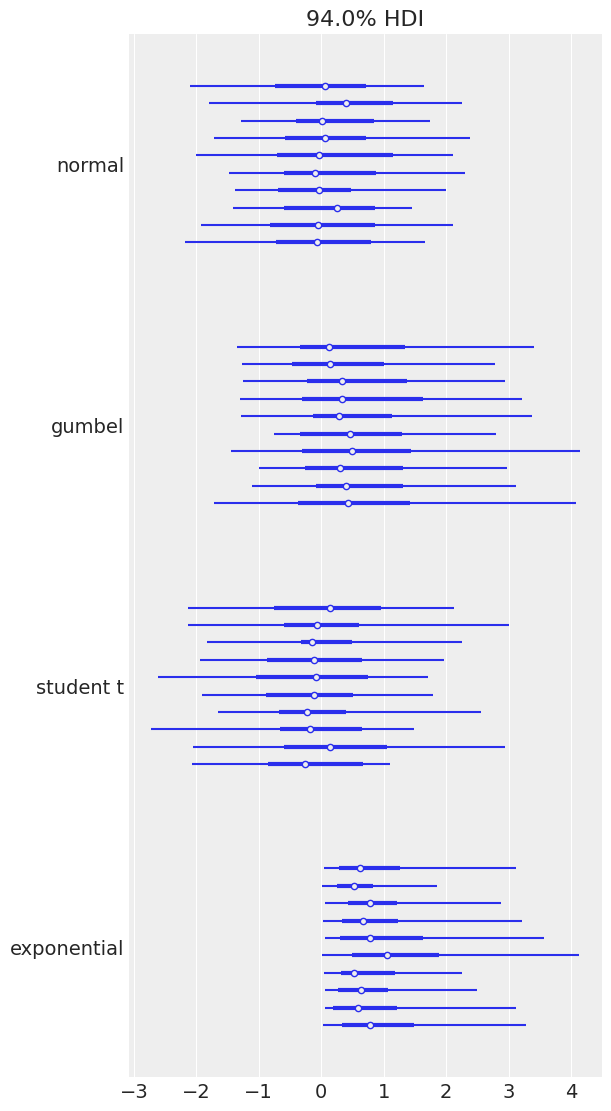

In [7]:
size = (10, 50)
az.plot_forest(
    {
        "normal": rng.normal(size=size),
        "gumbel": rng.gumbel(size=size),
        "student t": rng.standard_t(df=6, size=size),
        "exponential": rng.exponential(size=size),
    }
);

In [8]:
# Load the centered eight schools model
data = az.load_arviz_data("centered_eight")
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [9]:
data.posterior

<xarray.Dataset> Size: 165kB
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 16kB ...
    theta    (chain, draw, school) float64 128kB ...
    tau      (chain, draw) float64 16kB ...
Attributes:
    created_at:                 2022-10-13T14:37:37.315398
    arviz_version:              0.13.0.dev0
    inference_library:          pymc
    inference_library_version:  4.2.2
    sampling_time:              7.480114936828613
    tuning_steps:               1000